<a href="https://colab.research.google.com/github/hasmira0105/Public-repo/blob/main/first_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount drive to collab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Preprocessing dataset and deploy apply image augmentation

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation = ImageDataGenerator(rescale=1/255)


training_dataset = train.flow_from_directory(
    '/content/drive/MyDrive/DATASET/TRAIN',
    target_size = (300, 300),
    batch_size = 50,
    class_mode = 'categorical'
)

validation_dataset = validation.flow_from_directory(
    '/content/drive/MyDrive/DATASET/VALIDATION',
    target_size = (300, 300),
    batch_size = 50,
    class_mode = 'categorical'
)

Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


Creating the model

In [3]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

Compile the model

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train the dataset

In [5]:
history = model.fit(
    training_dataset,
    steps_per_epoch = 8,
    epochs = 50,
    verbose = 1,
    validation_data = validation_dataset,
    validation_steps = 2
)

Epoch 1/50
8/8 [==============================] - 204s 22s/step - loss: 33.8139 - accuracy: 0.3395 - val_loss: 11.2171 - val_accuracy: 0.3700
Epoch 2/50
8/8 [==============================] - 104s 13s/step - loss: 7.4158 - accuracy: 0.3200 - val_loss: 1.2277 - val_accuracy: 0.2700
Epoch 3/50
8/8 [==============================] - 72s 9s/step - loss: 1.1318 - accuracy: 0.3297 - val_loss: 1.0850 - val_accuracy: 0.3400
Epoch 4/50
8/8 [==============================] - 50s 6s/step - loss: 1.0549 - accuracy: 0.3809 - val_loss: 1.0734 - val_accuracy: 0.3500
Epoch 5/50
8/8 [==============================] - 32s 4s/step - loss: 1.0634 - accuracy: 0.3491 - val_loss: 1.0734 - val_accuracy: 0.4000
Epoch 6/50
8/8 [==============================] - 22s 3s/step - loss: 1.0792 - accuracy: 0.3577 - val_loss: 1.0417 - val_accuracy: 0.4700
Epoch 7/50
8/8 [==============================] - 19s 2s/step - loss: 1.0410 - accuracy: 0.4491 - val_loss: 1.0202 - val_accuracy: 0.5100
Epoch 8/50
8/8 [============

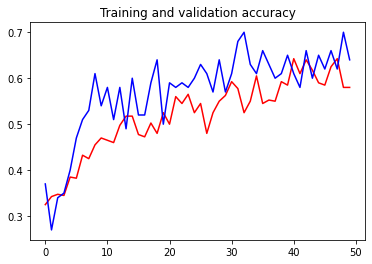

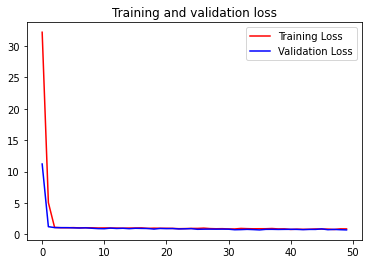

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()